# MobileNet Inference Notebook
Simple notebook for image classification using the trained MobileNetV2 model.

**Classes:** banana, pizza, sushi, tomato

In [4]:
# Import required libraries
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [5]:
# Load the trained model
MODEL_PATH = 'model_MobileNet.h5'

print(f"Loading model from {MODEL_PATH}...")

# Load model with custom objects to handle preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
custom_objects = {'preprocess_input': preprocess_input}

try:
    model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)
except:
    # If custom_objects doesn't work, load without compile
    model = tf.keras.models.load_model(MODEL_PATH, compile=False)

print("✓ Model loaded successfully!\n")

# Define class names
CLASS_NAMES = ['banana', 'pizza', 'sushi', 'tomato']
INPUT_SIZE = (128, 128)

Loading model from model_MobileNet.h5...


✓ Model loaded successfully!



## 🔍 Run Inference
**Simply change the `IMAGE_PATH` below and run the cell!**


📊 PREDICTION RESULTS
🎯 Predicted Class: PIZZA
📈 Confidence:      0.9999 (99.99%)

📋 All Class Probabilities:
--------------------------------------------------
banana    : 0.0000 ( 0.00%) 
pizza     : 0.9999 (99.99%) █████████████████████████████
sushi     : 0.0001 ( 0.01%) 
tomato    : 0.0000 ( 0.00%) 


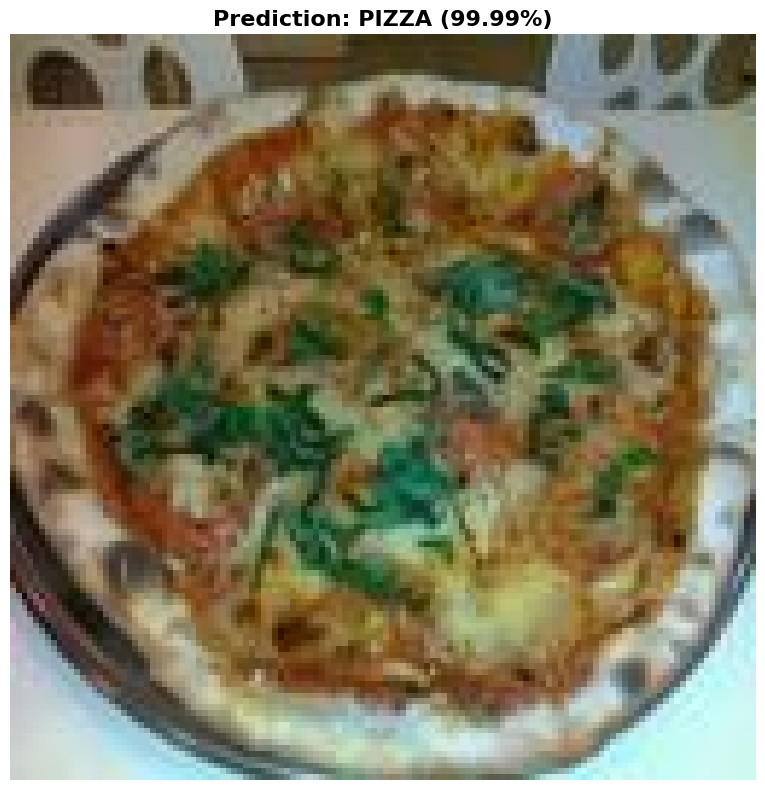

In [6]:
# ========================================
# 📝 CHANGE THIS PATH TO YOUR IMAGE
# ========================================
IMAGE_PATH = '/Users/zakariabaou/Documents/AI Agent DL Project/AI-Tutor/pizza.jpeg'


# Load and preprocess image
if not os.path.exists(IMAGE_PATH):
    print(f"❌ Error: Image not found at {IMAGE_PATH}")
else:
    # Load image
    img = Image.open(IMAGE_PATH).convert('RGB')
    img_resized = img.resize(INPUT_SIZE)
    
    # Prepare for model
    img_array = np.array(img_resized, dtype=np.float32)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    predictions = model.predict(img_array, verbose=0)
    
    # Get results
    predicted_idx = np.argmax(predictions[0])
    confidence = predictions[0][predicted_idx]
    predicted_class = CLASS_NAMES[predicted_idx]
    
    # Display results
    print("\n" + "="*50)
    print(f"📊 PREDICTION RESULTS")
    print("="*50)
    print(f"🎯 Predicted Class: {predicted_class.upper()}")
    print(f"📈 Confidence:      {confidence:.4f} ({confidence*100:.2f}%)")
    print("="*50)
    
    # Show all class probabilities
    print("\n📋 All Class Probabilities:")
    print("-"*50)
    for class_name, score in zip(CLASS_NAMES, predictions[0]):
        bar = "█" * int(score * 30)
        print(f"{class_name:10s}: {score:.4f} ({score*100:5.2f}%) {bar}")
    
    # Display image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class.upper()} ({confidence*100:.2f}%)", 
              fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [7]:
import visualkeras
from PIL import ImageFont

# Visualisation simple en blocs
visualkeras.layered_view(model, legend=True, draw_volume=True, spacing=30).show()

# Si tu veux une version plate (plus adaptée à ton Flatten + Dense)
visualkeras.layered_view(model, legend=True).save("MobileNet_modele.png")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
